# Supermarket DataSet Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Dataset Using Pandas

In [2]:
mkt = pd.read_csv("supermarket_sales.csv")
mkt.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


### Getting Data Of Products As Per Sales

In [3]:
mkt["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

## City Having More Female Shoppers

In [4]:
mkt.groupby(["City","Gender"]).count()


Invoice ID  Branch  Customer type  Product line  Unit price  \
City      Gender                                                                
Mandalay  Female         162     162            162           162         162   
          Male           170     170            170           170         170   
Naypyitaw Female         178     178            178           178         178   
          Male           150     150            150           150         150   
Yangon    Female         161     161            161           161         161   
          Male           179     179            179           179         179   

                  Quantity  Tax 5%  Total  Date  Time  Payment  cogs  \
City      Gender                                                       
Mandalay  Female       162     162    162   162   162      162   162   
          Male         170     170    170   170   170      170   170   
Naypyitaw Female       178     178    178   178   178      178   178   
          Male         150     150    150   150   150      150   150   
Yangon    Female       161     161    161   161   161      161   161   
          Male         179     179    179   179   179      179   179   

                  gross margin percentage  gross income  Rating  
City      Gender                                                 
Mandalay  Female                      162           162     162  
          Male                        170           170     170  
Naypyitaw Female                      178           178     178  
          Male                        150           150     150  
Yangon    Female                      161           161     161  
          Male                        179           179     179

In [5]:
mkt_female = mkt.groupby(["City","Gender"]).size()
mkt_female

City       Gender
Mandalay   Female    162
           Male      170
Naypyitaw  Female    178
           Male      150
Yangon     Female    161
           Male      179
dtype: int64

Observations:
 - Mandalay    = 162 female
 - Naypyitaw   = 178 female
 - Yangon      = 161 female


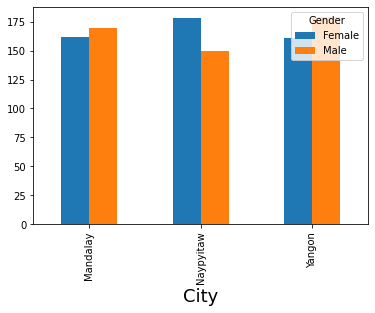

In [6]:
## using unstack to plot chart of hierarchical data
mkt_female.unstack(level=-1).plot(kind="bar")
plt.xlabel("City",fontsize=18)
plt.show()

## WhoSpent More On Shopping ?

In [7]:
## x = mkt[mkt["Gender"]=="Female"].sum()["Total"]
## y = mkt[mkt["Gender"]=="Male"].sum()["Total"]

## using gropuby
shop_mkt = mkt.groupby(["Gender"]).sum()["Total"]
shop_mkt

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

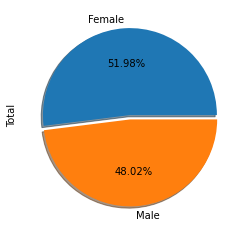

In [8]:
shop_mkt.plot(kind="pie",shadow=True,autopct="%1.2f%%",explode=[0,0.05])
plt.show()

Observations:
   - Female Spent More On Shopping Compared To Male

## Finding Total As Per Customer type and Gender

In [9]:
mkt.head(5)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
mkt_member = mkt.groupby(["Customer type","Gender"]).sum()["Total"]
mkt_member

Customer type  Gender
Member         Female    88146.9435
               Male      76076.5005
Normal         Female    79735.9815
               Male      79007.3235
Name: Total, dtype: float64

<AxesSubplot:xlabel='Gender'>

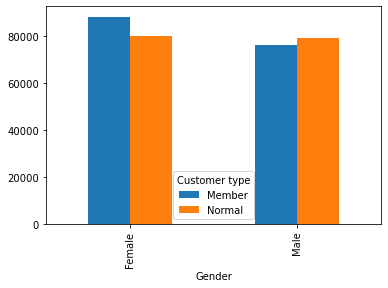

In [11]:
mkt_member.unstack(level=0).plot(kind="bar")

Observations:
   1. Member Female spent more on shopping
   2. Normal Male spent more on shopping

# 



## Highest selling products

In [12]:
mkt_prod = mkt.groupby("Product line").size()
mkt_prod

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
dtype: int64

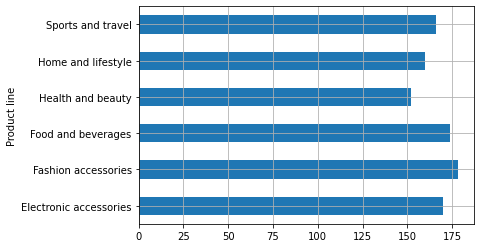

In [13]:
mkt_prod.plot(kind="barh")
plt.grid()

Observations: Fashion accessories is higher selling product

# 



##  Which Gender Spent More On Which Category

<AxesSubplot:xlabel='Total', ylabel='Product line'>

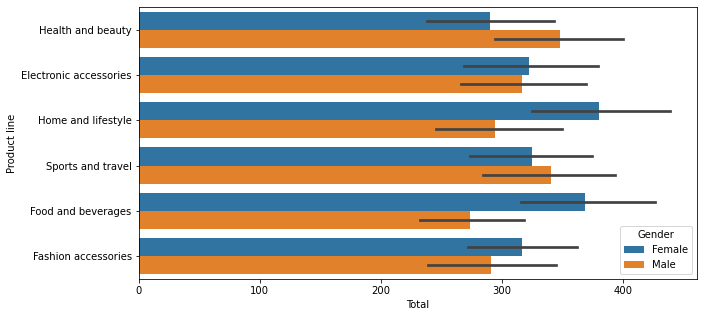

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x="Total",y="Product line",hue="Gender",data=mkt)

 Observations:
   - Female spent more on Health and beauty
   - Male spent more on Home and accessories

## Which Month Has More Sell ?

In [15]:
mkt.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [16]:
## converting date into day month format
mkt["Day"] = mkt["Date"].str.split("/").str[1]
mkt["Month"] = mkt["Date"].str.split("/").str[0]

In [17]:
##droping date column
mkt.drop("Date",axis=1,inplace=True)

In [18]:
mkt.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3


In [19]:
## maping month into mmm format
mkt["Month"] = mkt["Month"].map({"1":"Jan","2":"Feb","3":"Mar"})

In [20]:
mkt_month = mkt.groupby(["Month"]).sum()["Total"]
mkt_month

Month
Feb     97219.374
Jan    116291.868
Mar    109455.507
Name: Total, dtype: float64

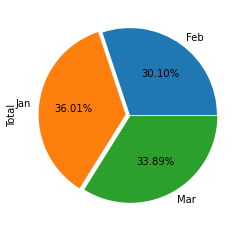

In [21]:
mkt_month.plot(kind="pie",autopct="%1.2f%%",explode=[0,0.05,0.01])
plt.show()

Observation : Jan has the highest sale

# 



## Which payment method used the most ?


In [22]:
mkt.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,8,Mar


Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


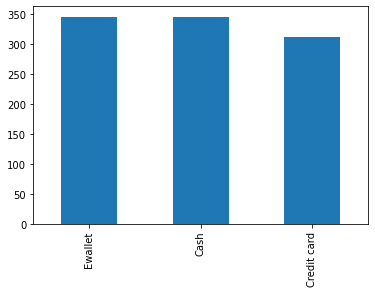

In [23]:
print(mkt.Payment.value_counts())
mkt.Payment.value_counts().plot(kind="bar")
plt.show()

Observations:
   1. Ewallet used the most
   2. Credit card used less

### 






## Is there any NULL value in the dataset

In [24]:
mkt.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
dtype: int64

#### There is no NULL value in the dataset

## find top rating given by customers

In [25]:
mkt.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,8,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,Feb


In [26]:
### round the rating column
mkt["Rating"] = round(mkt["Rating"])

Rating
4.0     102
5.0     133
6.0     193
7.0     159
8.0     179
9.0     141
10.0     93
dtype: int64


<AxesSubplot:xlabel='Rating'>

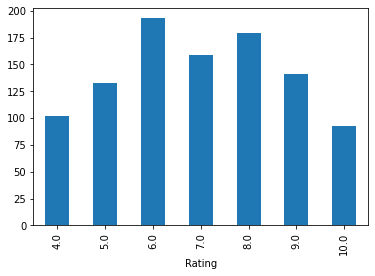

In [27]:
# mkt["Rating"].value_counts()
mkt_rat = mkt.groupby(["Rating"]).size()
print(mkt_rat)
mkt_rat.plot(kind="bar")

Observation:
  - Most Customers given 6 rating

## 






## Find the statistical paremeters of the dataset

In [28]:
mkt.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.975000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.795996
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,6.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000
